In [126]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [127]:
pip install -U matplotlib

Requirement already up-to-date: matplotlib in ./opt/anaconda3/lib/python3.8/site-packages (3.3.3)
Note: you may need to restart the kernel to use updated packages.


In [128]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib as mpl
import scipy.stats as si

In [129]:
initial_data = yf.download("PYPL ^VIX", start="2020-01-01", end="2020-11-30")

[*********************100%***********************]  2 of 2 completed


In [130]:
initial_data.head()

Adj Close              Close               High             \
                  PYPL   ^VIX        PYPL   ^VIX        PYPL       ^VIX   
Date                                                                      
2020-01-02  110.750000  12.47  110.750000  12.47  111.209999  13.720000   
2020-01-03  108.760002  14.02  108.760002  14.02  110.419998  16.200001   
2020-01-06  110.169998  13.85  110.169998  13.85  110.220001  16.389999   
2020-01-07  109.669998  13.79  109.669998  13.79  111.559998  14.460000   
2020-01-08  111.820000  13.45  111.820000  13.45  112.639999  15.240000   

                   Low               Open          Volume       
                  PYPL   ^VIX        PYPL   ^VIX     PYPL ^VIX  
Date                                                            
2020-01-02  109.275002  12.42  109.470001  13.46  7418800    0  
2020-01-03  108.760002  13.13  109.489998  15.01  7098300    0  
2020-01-06  107.440002  13.54  107.570000  15.45  6764500    0  
2020-01-07  109.529999  13.39  111.500000  13.84  6898700    0  
2020-01-08  109.820000  12.83  110.400002  15.16  8293600    0

In [131]:
initial_data['Adj Close'].head()

,PYPL,^VIX
Date,,
2020-01-02,110.750000,12.47
2020-01-03,108.760002,14.02
2020-01-06,110.169998,13.85
2020-01-07,109.669998,13.79
2020-01-08,111.820000,13.45


In [132]:
data =  initial_data['Adj Close']
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 230 entries, 2020-01-02 to 2020-11-27
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PYPL    230 non-null    float64
 1   ^VIX    230 non-null    float64
dtypes: float64(2)
memory usage: 5.4 KB


In [133]:
data.head()

,PYPL,^VIX
Date,,
2020-01-02,110.750000,12.47
2020-01-03,108.760002,14.02
2020-01-06,110.169998,13.85
2020-01-07,109.669998,13.79
2020-01-08,111.820000,13.45


In [134]:
data.tail()

,PYPL,^VIX
Date,,
2020-11-20,192.669998,23.700001
2020-11-23,200.820007,22.660000
2020-11-24,206.000000,21.639999
2020-11-25,214.460007,21.250000
2020-11-27,211.389999,20.840000


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

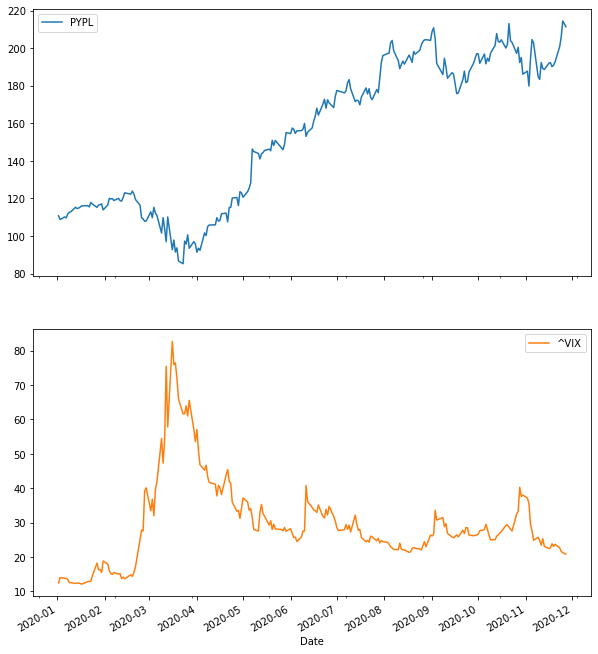

In [135]:
data.plot(figsize=(10, 12), subplots=True)

In [136]:
data.describe().round(2)

,PYPL,^VIX
count,230.00,230.00
mean,155.13,29.95
std,38.30,12.73
min,85.26,12.10
25%,116.14,23.15
50%,162.53,27.57
75%,191.89,33.59
max,214.46,82.69


In [137]:
data.diff().head()

,PYPL,^VIX
Date,,
2020-01-02,NaN,NaN
2020-01-03,-1.989998,1.55
2020-01-06,1.409996,-0.17
2020-01-07,-0.500000,-0.06
2020-01-08,2.150002,-0.34


In [138]:
data.diff().describe().round(2)

,PYPL,^VIX
count,229.00,229.00
mean,0.44,0.04
std,4.75,3.74
min,-18.01,-17.64
25%,-1.83,-1.36
50%,0.36,-0.20
75%,2.96,0.93
max,17.98,24.86


In [139]:
data.pct_change().round(4).head()

,PYPL,^VIX
Date,,
2020-01-02,NaN,NaN
2020-01-03,-0.0180,0.1243
2020-01-06,0.0130,-0.0121
2020-01-07,-0.0045,-0.0043
2020-01-08,0.0196,-0.0247


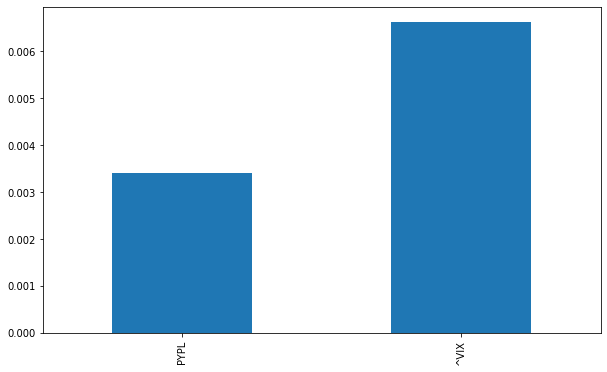

In [140]:
data.pct_change().mean().plot(kind='bar', figsize=(10, 6));

In [141]:
rets = np.log(data / data.shift(1))
rets.head().round(4)

,PYPL,^VIX
Date,,
2020-01-02,NaN,NaN
2020-01-03,-0.0181,0.1172
2020-01-06,0.0129,-0.0122
2020-01-07,-0.0045,-0.0043
2020-01-08,0.0194,-0.0250


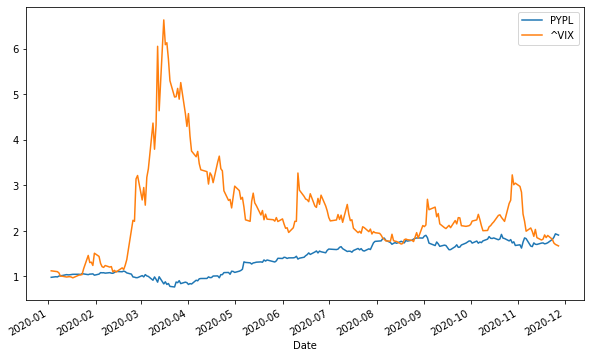

In [142]:
rets.cumsum().apply(np.exp).plot(figsize=(10, 6));

In [147]:
sym = 'PYPL'
PYPL_data = pd.DataFrame(data[sym]).dropna()
PYPL_data.tail()

,PYPL
Date,
2020-11-20,192.669998
2020-11-23,200.820007
2020-11-24,206.000000
2020-11-25,214.460007
2020-11-27,211.389999


In [148]:
window = 10
PYPL_data['min'] = data[sym].rolling(window=window).min()
PYPL_data['mean'] = data[sym].rolling(window=window).mean()
PYPL_data['std'] = data[sym].rolling(window=window).std()
PYPL_data['median'] = data[sym].rolling(window=window).median()
PYPL_data['max'] = data[sym].rolling(window=window).max()
PYPL_data['ewma'] = data[sym].ewm(halflife=0.5, min_periods=window).mean()
PYPL_data.dropna().head()

,PYPL,min,mean,std,median,max,ewma
Date,,,,,,,
2020-01-15,114.849998,108.760002,112.143999,2.302251,112.195000,115.279999,114.798137
2020-01-16,115.400002,108.760002,112.609000,2.454005,112.750000,115.400002,115.249535
2020-01-17,116.040001,109.669998,113.337000,2.257246,113.785000,116.040001,115.842385
2020-01-21,116.150002,109.669998,113.935000,2.112489,114.744999,116.150002,116.073097
2020-01-22,115.500000,111.820000,114.518000,1.528382,115.064999,116.150002,115.643274


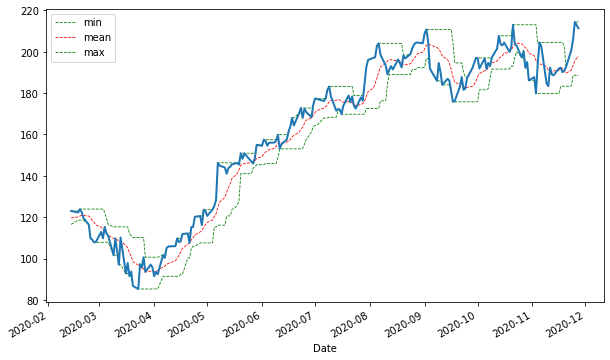

In [149]:
ax = PYPL_data[['min', 'mean', 'max']].iloc[-200:].plot(figsize=(10, 6), style=['g--', 'r--', 'g--'], lw=0.8)
data[sym].iloc[-200:].plot(ax=ax, lw=2.0);

In [150]:
PYPL_data['SMA1'] = data[sym].rolling(window=20).mean()
PYPL_data['SMA2'] = data[sym].rolling(window=60).mean()
PYPL_data[[sym, 'SMA1', 'SMA2']].tail()

,PYPL,SMA1,SMA2
Date,,,
2020-11-20,192.669998,191.817498,193.872167
2020-11-23,200.820007,191.997498,193.811167
2020-11-24,206.000000,192.275999,193.842167
2020-11-25,214.460007,193.383499,193.934334
2020-11-27,211.389999,194.200999,193.943834


<AxesSubplot:xlabel='Date'>

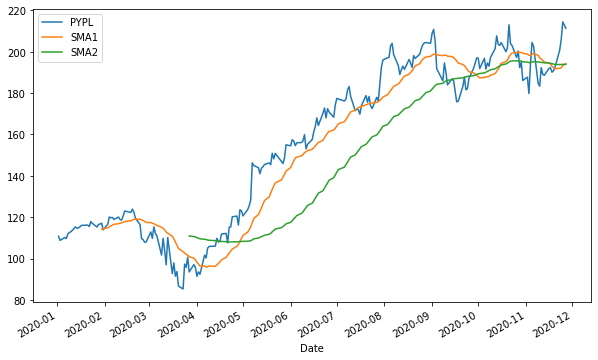

In [151]:
PYPL_data[[sym, 'SMA1', 'SMA2']].plot(figsize=(10, 6))

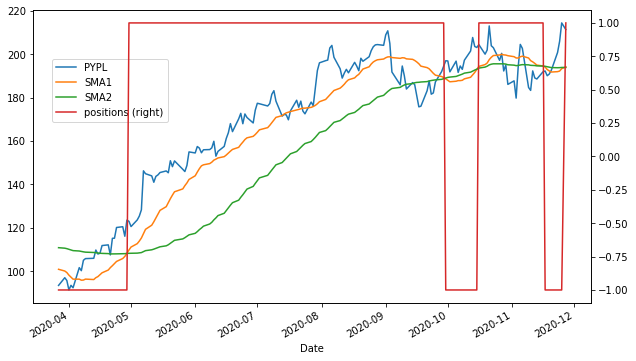

In [152]:
PYPL_data.dropna(inplace=True)
PYPL_data['positions'] = np.where(PYPL_data['SMA1'] > PYPL_data['SMA2'],1,-1)
ax = PYPL_data[[sym, 'SMA1', 'SMA2', 'positions']].plot(figsize=(10, 6),secondary_y='positions')
ax.get_legend().set_bbox_to_anchor((0.25, 0.85))

In [153]:
Corr_data = data[['PYPL', '^VIX']].dropna()
Corr_data.tail()

,PYPL,^VIX
Date,,
2020-11-20,192.669998,23.700001
2020-11-23,200.820007,22.660000
2020-11-24,206.000000,21.639999
2020-11-25,214.460007,21.250000
2020-11-27,211.389999,20.840000


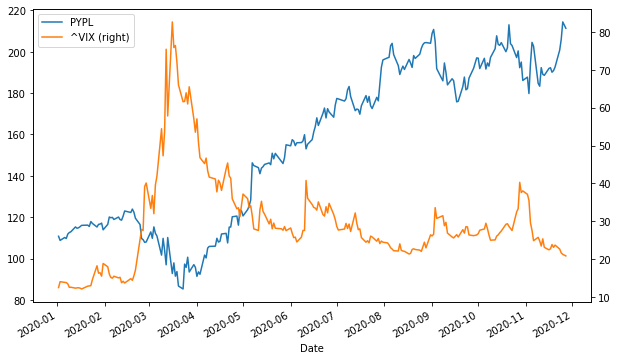

In [155]:
Corr_data.loc['2020-01-01':].plot(secondary_y='^VIX', figsize=(10, 6));

In [156]:
sprets = np.log(Corr_data / Corr_data.shift(1))
sprets.head()

,PYPL,^VIX
Date,,
2020-01-02,NaN,NaN
2020-01-03,-0.018132,0.117159
2020-01-06,0.012881,-0.012200
2020-01-07,-0.004549,-0.004342
2020-01-08,0.019415,-0.024965


In [160]:
sprets.corr()

,PYPL,^VIX
PYPL,1.000000,-0.563978
^VIX,-0.563978,1.000000


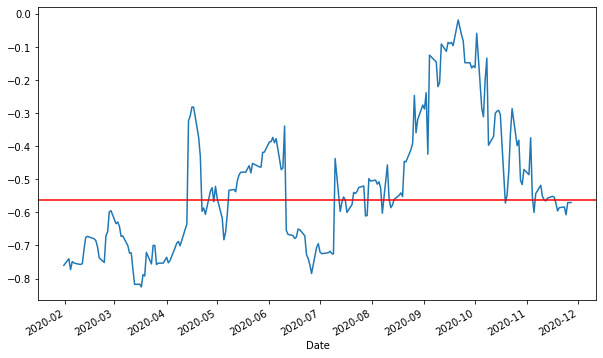

In [161]:
ax = sprets['PYPL'].rolling(window=20).corr(sprets['^VIX']).plot(figsize=(10, 6)) 
ax.axhline(sprets.corr().iloc[0, 1], c='r');

In [162]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as si
import yfinance as yf
import os

# Historical Volatility

In [163]:
PYPL = yf.download("PYPL", start="2020-01-01", end="2020-11-30")

[*********************100%***********************]  1 of 1 completed


In [164]:
S = PYPL['Adj Close'][-1]
print('The spot price is $', round(S,2), '.')

The spot price is $ 211.39 .


In [165]:
log_return = np.log(PYPL['Adj Close'] / PYPL['Adj Close'].shift(1))
vol_h = np.sqrt(252) * log_return.std()
print('The annualised volatility is', round(vol_h*100,2), '%')

The annualised volatility is 54.12 %


# Market Volatility

In [166]:
VIX = yf.download("^VIX", start="2020-01-01", end="2020-11-30")

[*********************100%***********************]  1 of 1 completed


In [167]:
VIX

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,13.460000,13.720000,12.420000,12.470000,12.470000,0
2020-01-03,15.010000,16.200001,13.130000,14.020000,14.020000,0
2020-01-06,15.450000,16.389999,13.540000,13.850000,13.850000,0
2020-01-07,13.840000,14.460000,13.390000,13.790000,13.790000,0
2020-01-08,15.160000,15.240000,12.830000,13.450000,13.450000,0
...,...,...,...,...,...,...
2020-11-20,23.430000,23.730000,22.129999,23.700001,23.700001,0
2020-11-23,23.660000,23.959999,22.450001,22.660000,22.660000,0
2020-11-24,22.040001,22.480000,20.799999,21.639999,21.639999,0


In [168]:
print('The market volatility is', round(VIX['Adj Close'][-1],2) , '% .')

The market volatility is 20.84 % .


# Volatility smile

In [169]:
def newton_vol_call(S, K, T, C, r):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #C: Call value
    #r: risk free rate
    #sigma: volatility of underlying asset
   
    MAX_ITERATIONS = 1000
    tolerance = 0.000001
    
    sigma = 0.25
    
    for i in range(0, MAX_ITERATIONS):
        d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
        d2 = (np.log(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
        price = S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
        vega = S * np.sqrt(T) * si.norm.pdf(d1, 0.0, 1.0)

        diff = C - price

        if (abs(diff) < tolerance):
            return sigma
        else: 
            sigma = sigma + diff/vega
        
        print(i,sigma,diff)
        
    return sigma

In [170]:
PAYPAL = yf.Ticker("PYPL")
opt = PAYPAL.option_chain('2020-12-31')
opt.calls

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,PYPL201231C00140000,2020-12-03 16:46:59,140.0,75.05,73.35,74.90,0.00,0.000000,1.0,6,0.000010,True,REGULAR,USD
1,PYPL201231C00145000,2020-11-30 14:35:14,145.0,66.65,68.35,69.95,0.00,0.000000,4.0,40,0.000010,True,REGULAR,USD
2,PYPL201231C00150000,2020-11-23 18:04:06,150.0,49.05,63.35,64.50,0.00,0.000000,1.0,21,0.000010,True,REGULAR,USD
3,PYPL201231C00155000,2020-12-03 17:51:31,155.0,59.60,58.35,59.75,0.00,0.000000,4.0,3,0.000010,True,REGULAR,USD
4,PYPL201231C00160000,2020-12-04 20:03:36,160.0,57.35,53.40,54.65,0.00,0.000000,1.0,4,0.000010,True,REGULAR,USD
5,PYPL201231C00165000,2020-12-09 20:23:22,165.0,45.85,48.40,49.95,0.00,0.000000,1.0,15,0.000010,True,REGULAR,USD
6,PYPL201231C00167500,2020-11-25 18:37:00,167.5,46.75,45.90,47.50,0.00,0.000000,NaN,7,0.000010,True,REGULAR,USD
7,PYPL201231C00170000,2020-12-04 19:52:09,170.0,47.85,43.50,45.05,0.00,0.000000,4.0,5,0.000010,True,REGULAR,USD
8,PYPL201231C00172500,2020-11-19 14:44:52,172.5,22.35,40.95,42.60,0.00,0.000000,NaN,1,0.000010,True,REGULAR,USD
9,PYPL201231C00175000,2020-12-08 20:30:02,175.0,42.50,38.50,40.15,0.00,0.000000,5.0,22,0.000010,True,REGULAR,USD


In [171]:
impvol = newton_vol_call(S, 212.5, 1/12, float(opt.calls.lastPrice[opt.calls.strike == 212.5]), 0.009)
print('The implied volatility is', round(impvol*100,2) , '% for the one-month call with strike $ 212.5' )

0 0.3163629324044518 1.6150337850124288
1 0.31634851035228023 -0.00035109797644850005
The implied volatility is 31.63 % for the one-month call with strike $ 212.5


In [172]:
import mibian

In [173]:
c = mibian.BS([S, 212.5, 0.9, 31], callPrice = float(opt.calls.lastPrice[opt.calls.strike == 212.5]))
c.impliedVolatility
print('The implied volatility is', round(c.impliedVolatility,2) , '% for the one-month call with strike $ 212.5' )

The implied volatility is 31.31 % for the one-month call with strike $ 212.5


In [174]:
impliedvol = np.zeros((len(opt.calls.strike),1))
for i in range(len(opt.calls.strike)):
    c = mibian.BS([S, opt.calls.strike[i], 0.9, 31], callPrice = opt.calls.lastPrice[i])
    impliedvol [i] = c.impliedVolatility

Text(0.5, 1.0, 'Volatility Smile')

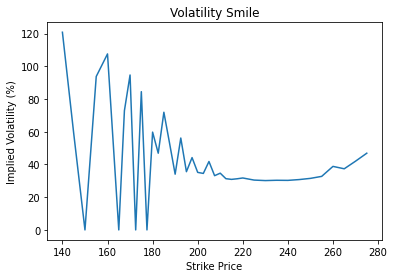

In [175]:
fig = plt.figure()
plt.plot(opt.calls.strike, impliedvol, '-')
plt.xlabel('Strike Price')
plt.ylabel('Implied Volatility (%)')
plt.title('Volatility Smile')

# Term structure of volatility

In [176]:
pip install -U arrow

Requirement already up-to-date: arrow in ./opt/anaconda3/lib/python3.8/site-packages (0.17.0)
Note: you may need to restart the kernel to use updated packages.


In [177]:
import arrow
T = ['2020-12-18','2020-12-24','2020-12-31']

In [178]:
now = arrow.get('2020-12-11')

In [179]:
delta = arrow.get (T [1]) - now
delta.days

13

In [180]:
impliedvol_t = np.zeros((len(T),1))
now = arrow.get('2020-12-11')
days = np.zeros((len(T),1))
for j in range(len(T)):
    opt = PAYPAL.option_chain(T[j])
    temp = arrow.get(T[j])
    delta = temp - now
    days[j] = delta.days
    c = mibian.BS([S, 212.5, 0.9, days[j]], callPrice = float(opt.calls.lastPrice[opt.calls.strike==212.5]))
    impliedvol_t [j] = c.impliedVolatility

Text(0.5, 1.0, 'Term structure of volatility')

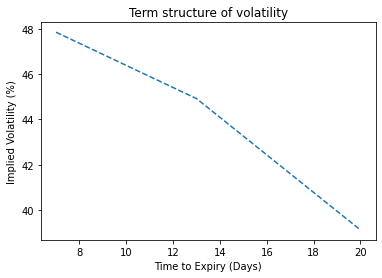

In [181]:
fig = plt.figure()
plt.plot(days, impliedvol_t, '--')
plt.xlabel('Time to Expiry (Days)')
plt.ylabel('Implied Volatility (%)')
plt.title('Term structure of volatility')

# BSM

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as si
import yfinance as yf

In [ ]:
def euro_option_bs(S, K, T, r, vol, payoff):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: risk free rate
    #vol: volatility of underlying asset
    #payoff: call or put
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        option_value = S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        option_value = - S * si.norm.cdf(-d1, 0.0, 1.0) + K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return option_value

In [193]:
euro_option_bs(211.39, 212.5, 1/12, 0.009, 0.54, 'call')

12.692453707697155

In [194]:
euro_option_bs(211.39, 212.5, 1/12, 0.009, 0.54, 'put')

13.64313845838359

In [195]:
S = np.linspace(150,250,11)
cp = np.zeros((len(S),1))
for i in range(len(S)):
    cp[i] = euro_option_bs(S[i], 212.5, 1/12, 0.009, 0.54, 'call')

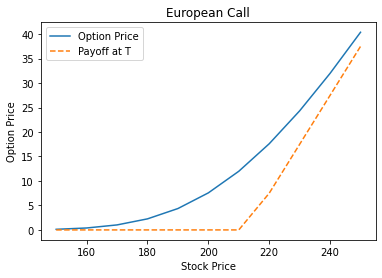

In [196]:
fig = plt.figure()
plt.plot(S, cp, '-')
plt.plot(S, np.maximum(S-212.5,0), '--')
plt.xlabel('Stock Price')
plt.ylabel('Option Price')
plt.title('European Call')
plt.legend(['Option Price','Payoff at T'])

In [197]:
T = np.linspace(0.25,3,12)
cp = np.zeros((len(T),1))
for i in range(len(T)):
    cp [i] = euro_option_bs(211.39, 212.5, T[i], 0.009, 0.54, 'call')

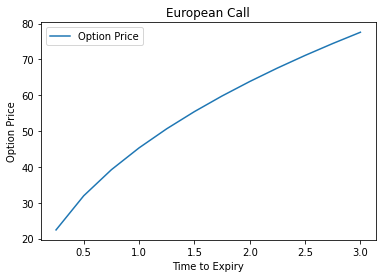

In [198]:
fig = plt.figure()
plt.plot(T, cp, '-')
plt.xlabel('Time to Expiry')
plt.ylabel('Option Price')
plt.title('European Call')
plt.legend(['Option Price'])

# Option Trading

Has Black Scholes correctly predicted the market value of the options?

In [199]:
PYPL = yf.Ticker("PYPL")
opt = PYPL.option_chain('2020-12-31')
opt.calls

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,PYPL201231C00140000,2020-12-03 16:46:59,140.0,75.05,73.35,74.90,0.00,0.000000,1.0,6,0.000010,True,REGULAR,USD
1,PYPL201231C00145000,2020-11-30 14:35:14,145.0,66.65,68.35,69.95,0.00,0.000000,4.0,40,0.000010,True,REGULAR,USD
2,PYPL201231C00150000,2020-11-23 18:04:06,150.0,49.05,63.35,64.50,0.00,0.000000,1.0,21,0.000010,True,REGULAR,USD
3,PYPL201231C00155000,2020-12-03 17:51:31,155.0,59.60,58.35,59.75,0.00,0.000000,4.0,3,0.000010,True,REGULAR,USD
4,PYPL201231C00160000,2020-12-04 20:03:36,160.0,57.35,53.40,54.65,0.00,0.000000,1.0,4,0.000010,True,REGULAR,USD
5,PYPL201231C00165000,2020-12-09 20:23:22,165.0,45.85,48.40,49.95,0.00,0.000000,1.0,15,0.000010,True,REGULAR,USD
6,PYPL201231C00167500,2020-11-25 18:37:00,167.5,46.75,45.90,47.50,0.00,0.000000,NaN,7,0.000010,True,REGULAR,USD
7,PYPL201231C00170000,2020-12-04 19:52:09,170.0,47.85,43.50,45.05,0.00,0.000000,4.0,5,0.000010,True,REGULAR,USD
8,PYPL201231C00172500,2020-11-19 14:44:52,172.5,22.35,40.95,42.60,0.00,0.000000,NaN,1,0.000010,True,REGULAR,USD
9,PYPL201231C00175000,2020-12-08 20:30:02,175.0,42.50,38.50,40.15,0.00,0.000000,5.0,22,0.000010,True,REGULAR,USD


In [200]:
data = yf.download("PYPL", start="2020-01-01", end="2020-11-30")

[*********************100%***********************]  1 of 1 completed


In [201]:
data['Adj Close']

Date
2020-01-02    110.750000
2020-01-03    108.760002
2020-01-06    110.169998
2020-01-07    109.669998
2020-01-08    111.820000
                 ...    
2020-11-20    192.669998
2020-11-23    200.820007
2020-11-24    206.000000
2020-11-25    214.460007
2020-11-27    211.389999
Name: Adj Close, Length: 230, dtype: float64

In [202]:
S = data['Adj Close'][-1]
K = opt.calls['strike']
T = 1/12
r = 0.0090
log_return = np.log(data['Adj Close'] / data['Adj Close'].shift(1))
vol = np.sqrt(252) * log_return.std() 
vol

0.5412040419182187

In [203]:
PYPL_bs_call = np.zeros((len(K),1))
for i in range(len(K)):
    PYPL_bs_call [i] = euro_option_bs(S, K[i], T, r, vol, 'call')

In [204]:
opt.calls['BSPrice'] = pd.DataFrame(PYPL_bs_call)
opt.calls

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,BSPrice
0,PYPL201231C00140000,2020-12-03 16:46:59,140.0,75.05,73.35,74.90,0.00,0.000000,1.0,6,0.000010,True,REGULAR,USD,71.529219
1,PYPL201231C00145000,2020-11-30 14:35:14,145.0,66.65,68.35,69.95,0.00,0.000000,4.0,40,0.000010,True,REGULAR,USD,66.569044
2,PYPL201231C00150000,2020-11-23 18:04:06,150.0,49.05,63.35,64.50,0.00,0.000000,1.0,21,0.000010,True,REGULAR,USD,61.637761
3,PYPL201231C00155000,2020-12-03 17:51:31,155.0,59.60,58.35,59.75,0.00,0.000000,4.0,3,0.000010,True,REGULAR,USD,56.751614
4,PYPL201231C00160000,2020-12-04 20:03:36,160.0,57.35,53.40,54.65,0.00,0.000000,1.0,4,0.000010,True,REGULAR,USD,51.931961
5,PYPL201231C00165000,2020-12-09 20:23:22,165.0,45.85,48.40,49.95,0.00,0.000000,1.0,15,0.000010,True,REGULAR,USD,47.205148
6,PYPL201231C00167500,2020-11-25 18:37:00,167.5,46.75,45.90,47.50,0.00,0.000000,NaN,7,0.000010,True,REGULAR,USD,44.885978
7,PYPL201231C00170000,2020-12-04 19:52:09,170.0,47.85,43.50,45.05,0.00,0.000000,4.0,5,0.000010,True,REGULAR,USD,42.601743
8,PYPL201231C00172500,2020-11-19 14:44:52,172.5,22.35,40.95,42.60,0.00,0.000000,NaN,1,0.000010,True,REGULAR,USD,40.356692
9,PYPL201231C00175000,2020-12-08 20:30:02,175.0,42.50,38.50,40.15,0.00,0.000000,5.0,22,0.000010,True,REGULAR,USD,38.155137


In [205]:
opt.calls['estimate_error'] = ((opt.calls['lastPrice'] - opt.calls['BSPrice'])/opt.calls['BSPrice'])*100
opt.calls['estimate_error']

0      4.922158
1      0.121613
2    -20.422158
3      5.019039
4     10.432957
5     -2.870762
6      4.152793
7     12.319349
8    -44.618850
9     11.387362
10    -6.670244
11     2.537936
12    -2.994979
13    10.652200
14    -0.272872
15   -12.038491
16     2.035242
17   -15.323283
18    -9.461340
19   -20.571625
20   -24.083745
21   -16.804110
22   -32.380103
23   -33.103440
24   -43.010895
25   -47.916614
26   -50.865425
27   -53.956369
28   -64.687968
29   -72.489885
30   -78.255374
31   -83.189665
32   -87.013500
33   -88.903326
34   -89.746000
35   -77.413738
36   -85.393337
37   -73.593876
38   -58.504255
Name: estimate_error, dtype: float64

In [206]:
opt.calls

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,BSPrice,estimate_error
0,PYPL201231C00140000,2020-12-03 16:46:59,140.0,75.05,73.35,74.90,0.00,0.000000,1.0,6,0.000010,True,REGULAR,USD,71.529219,4.922158
1,PYPL201231C00145000,2020-11-30 14:35:14,145.0,66.65,68.35,69.95,0.00,0.000000,4.0,40,0.000010,True,REGULAR,USD,66.569044,0.121613
2,PYPL201231C00150000,2020-11-23 18:04:06,150.0,49.05,63.35,64.50,0.00,0.000000,1.0,21,0.000010,True,REGULAR,USD,61.637761,-20.422158
3,PYPL201231C00155000,2020-12-03 17:51:31,155.0,59.60,58.35,59.75,0.00,0.000000,4.0,3,0.000010,True,REGULAR,USD,56.751614,5.019039
4,PYPL201231C00160000,2020-12-04 20:03:36,160.0,57.35,53.40,54.65,0.00,0.000000,1.0,4,0.000010,True,REGULAR,USD,51.931961,10.432957
5,PYPL201231C00165000,2020-12-09 20:23:22,165.0,45.85,48.40,49.95,0.00,0.000000,1.0,15,0.000010,True,REGULAR,USD,47.205148,-2.870762
6,PYPL201231C00167500,2020-11-25 18:37:00,167.5,46.75,45.90,47.50,0.00,0.000000,NaN,7,0.000010,True,REGULAR,USD,44.885978,4.152793
7,PYPL201231C00170000,2020-12-04 19:52:09,170.0,47.85,43.50,45.05,0.00,0.000000,4.0,5,0.000010,True,REGULAR,USD,42.601743,12.319349
8,PYPL201231C00172500,2020-11-19 14:44:52,172.5,22.35,40.95,42.60,0.00,0.000000,NaN,1,0.000010,True,REGULAR,USD,40.356692,-44.618850
9,PYPL201231C00175000,2020-12-08 20:30:02,175.0,42.50,38.50,40.15,0.00,0.000000,5.0,22,0.000010,True,REGULAR,USD,38.155137,11.387362


In [207]:
opt.calls['estimate_error'].describe()

count    39.000000
mean    -31.614758
std      34.698361
min     -89.746000
25%     -61.596112
50%     -20.571625
75%      -0.075630
max      12.319349
Name: estimate_error, dtype: float64

Text(0.5, 1.0, 'Histogram of Estimate Error')

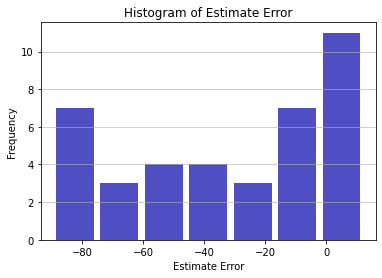

In [208]:
n, bins, patches = plt.hist(x=opt.calls['estimate_error'], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Estimate Error')
plt.ylabel('Frequency')
plt.title('Histogram of Estimate Error')

# Monte Carlo Simulation

In [308]:
import numpy as np

In [309]:
def mcs_simulation_np(p):
    M = p
    I = p
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * rn[t]) 
    return S

In [310]:
T = 1/12
r = 0.009
sigma = 0.54
S0 = 211.59
K = 212.5

In [311]:
S = mcs_simulation_np(1000)

In [312]:
S = np.transpose(S)
S

array([[211.59      , 210.50427871, 209.85701059, ..., 187.8788935 ,
        187.83086037, 186.97437165],
       [211.59      , 212.07782716, 212.42166165, ..., 251.27502908,
        251.49487884, 254.94646723],
       [211.59      , 212.7565057 , 212.16246294, ..., 226.46337609,
        226.85512111, 224.55782398],
       ...,
       [211.59      , 210.48764938, 210.59583267, ..., 186.7372225 ,
        186.45676941, 187.33570276],
       [211.59      , 212.1215748 , 213.36923154, ..., 253.0239509 ,
        255.06206396, 255.82552931],
       [211.59      , 211.04051538, 210.63440981, ..., 231.48405103,
        232.61344377, 232.02800129]])

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-preiod values')

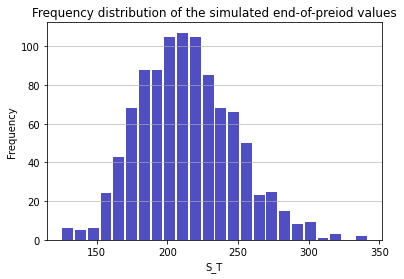

In [313]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=S[:,-1], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('S_T')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end-of-preiod values')

In [314]:
p = np.mean(np.maximum(K - S[:,-1],0))
print('European put', str(p))

European put 12.751457422905133


In [315]:
c = np.mean(np.maximum(S[:,-1] - K,0))
print('European call', str(c))

European call 14.118037664086746


# Greeks

In [219]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as si

# Option value

In [220]:
def euro_option_bs(S, K, T, r, vol, payoff):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: risk free rate
    #vol: volatility of underlying asset
    #payoff: call or put
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        option_value = S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        option_value = - S * si.norm.cdf(-d1, 0.0, 1.0) + K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return option_value

In [221]:
euro_option_bs(211.39, 212.5, 1/12, 0.009, 0.54, 'call')

12.692453707697155

In [231]:
euro_option_bs(211.39, 212.5, 1/12, 0.009, 0.54, 'put')

13.64313845838359

In [232]:
S = np.linspace(150,300,11)
Call = np.zeros((len(S),1))
Put = np.zeros((len(S),1))
for i in range(len(S)):
    Call [i] = euro_option_bs(S[i], 212.5, 1/12, 0.009, 0.54, 'call')
    Put [i] = euro_option_bs(S[i], 212.5, 1/12, 0.009, 0.54, 'put')

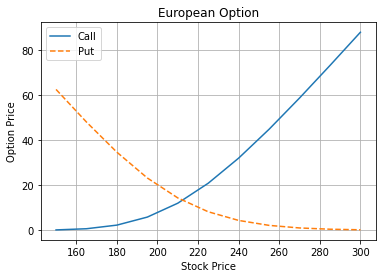

In [233]:
fig = plt.figure()
plt.plot(S, Call, '-')
plt.plot(S, Put, '--')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Option Price')
plt.title('European Option')
plt.legend(['Call','Put'])

# Delta

In [237]:
def delta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta = np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0)
    elif payoff == "put":
        delta =  - np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0)
    
    return delta

In [238]:
delta(211.39, 212.5, 1/12, 0.009, 0, 0.54, 'call')

0.5196028142746117

In [240]:
delta(211.39, 212.5, 1/12, 0.009, 0, 0.54, 'put')

-0.4803971857253882

In [241]:
S = np.linspace(150,300,11)
Delta_Call = np.zeros((len(S),1))
Delta_Put = np.zeros((len(S),1))
for i in range(len(S)):
    Delta_Call [i] = delta(S[i], 212.5, 1/12, 0.009, 0, 0.54, 'call')
    Delta_Put [i] = delta(S[i], 212.5, 1/12, 0.009, 0, 0.54, 'put')

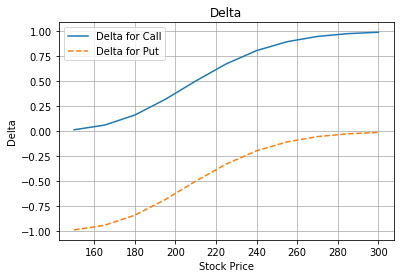

In [242]:
fig = plt.figure()
plt.plot(S, Delta_Call, '-')
plt.plot(S, Delta_Put, '--')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Delta')
plt.title('Delta')
plt.legend(['Delta for Call','Delta for Put'])

# Gamma

In [244]:
def gamma(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(-r * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * T)
    
    return gamma

In [245]:
gamma (211.39, 212.5, 1/12, 0.009, 0, 0.54, 'call')

0.04185647787616714

In [247]:
gamma (211.39, 212.5, 1/12, 0.009, 0, 0.54, 'put')

0.04185647787616714

In [248]:
S = np.linspace(150,300,11)
Gamma = np.zeros((len(S),1))
for i in range(len(S)):
    Gamma [i] = gamma(S[i], 212.5, 1/12, 0.009, 0, 0.54, 'call')

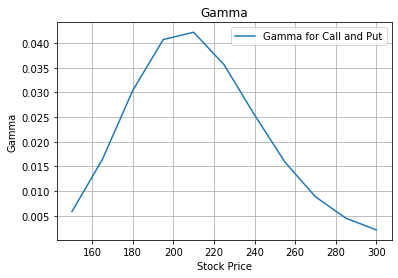

In [249]:
fig = plt.figure()
plt.plot(S, Gamma, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Gamma')
plt.title('Gamma')
plt.legend(['Gamma for Call and Put'])

# Speed

In [266]:
def speed(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    speed = np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / ((vol **2) * (S**2) * T) * (d1 + vol * np.sqrt(T))
    
    return speed

In [267]:
speed (211.39, 212.5, 1/12, 0.009, 0, 0.54, 'call')

7.524049001536042e-05

In [268]:
speed (211.39, 212.5, 1/12, 0.009, 0, 0.54, 'put')

7.524049001536042e-05

In [269]:
S = np.linspace(150,300,11)
Speed = np.zeros((len(S),1))
for i in range(len(S)):
    Speed [i] = speed(S[i], 212.5, 1/12, 0.009, 0, 0.54, 'call')

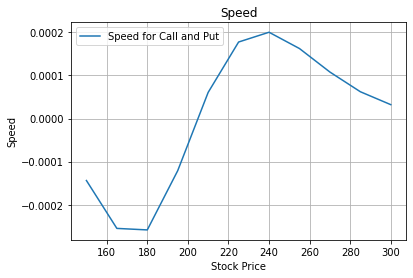

In [270]:
fig = plt.figure()
plt.plot(S, Speed, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Speed')
plt.title('Speed')
plt.legend(['Speed for Call and Put'])

# Theta

In [271]:
def theta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        theta = vol * S * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        theta = vol * S * np.exp(-q * T) * si.norm.pdf(-d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta

In [272]:
theta (211.39, 212.5, 1/12, 0.009, 0, 0.54, 'call')

79.65580558360881

In [289]:
theta (211.39, 212.5, 1/12, 0.009, 0, 0.54, 'put')

79.81823681273235

In [274]:
T = np.linspace(0.25,3,12)
Theta_Call = np.zeros((len(T),1))
Theta_Put = np.zeros((len(T),1))
for i in range(len(T)):
    Theta_Call [i] = theta (211.39, 212.5, T[i], 0.009, 0, 0.54, 'call')
    Theta_Put [i] = theta (211.39, 212.5, T[i], 0.009, 0, 0.54, 'put')

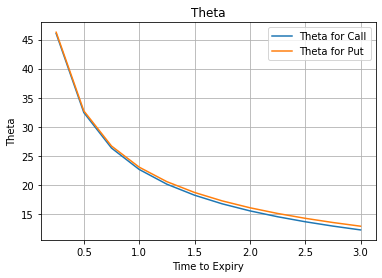

In [275]:
fig = plt.figure()
plt.plot(T, Theta_Call, '-')
plt.plot(T, Theta_Put, '-')
plt.grid()
plt.xlabel('Time to Expiry')
plt.ylabel('Theta')
plt.title('Theta')
plt.legend(['Theta for Call', 'Theta for Put'])

# Rho

In [290]:
def rho(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho =  K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        rho = - K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return rho

In [291]:
rho(211.39, 212.5, 1/12, 0.009, 0, 0.54, 'call')

8.095532100151086

In [292]:
rho(211.39, 212.5, 1/12, 0.009, 0, 0.54, 'put')

-9.599524962406116

In [294]:
0.01*rho(211.39, 212.5, 1/12, 0.009, 0, 0.54, 'call')

0.08095532100151086

In [293]:
r = np.linspace(0,0.1,11)
Rho_Call = np.zeros((len(r),1))
Rho_Put = np.zeros((len(r),1))
for i in range(len(r)):
    Rho_Call [i] = rho(211.39, 212.5, 1/12, r[i], 0, 0.54, 'call')
    Rho_Put [i] = rho(211.39, 212.5, 1/12, r[i], 0, 0.54, 'put')

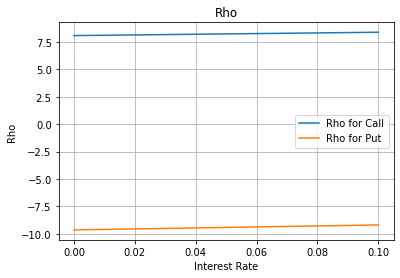

In [280]:
fig = plt.figure()
plt.plot(r, Rho_Call, '-')
plt.plot(r, Rho_Put, '-')
plt.grid()
plt.xlabel('Interest Rate')
plt.ylabel('Rho')
plt.title('Rho')
plt.legend(['Rho for Call', 'Rho for Put'])

# Vega

In [281]:
def vega(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    vega = S * np.sqrt(T) * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0)
    
    return vega

In [282]:
vega(211.39, 212.5, 1/12, 0.009, 0, 0.54, 'call')

24.315274110121134

In [283]:
vega(211.39, 212.5, 1/12, 0.009, 0, 0.54, 'put')

24.315274110121134

In [296]:
vol = np.linspace(0.1,0.4,13)
Vega = np.zeros((len(vol),1))
for i in range(len(vol)):
    Vega [i] = vega(211.39, 212.5, 1/12, 0.009, 0, vol[i], 'call')

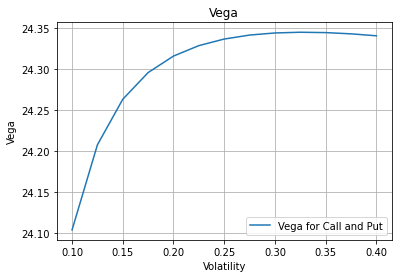

In [297]:
fig = plt.figure()
plt.plot(vol, Vega, '-')
plt.grid()
plt.xlabel('Volatility')
plt.ylabel('Vega')
plt.title('Vega')
plt.legend(['Vega for Call and Put'])

In [298]:
0.01*vega(211.39, 212.5, 1/12, 0.009, 0, 0.54, 'call')

0.24315274110121135